In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
/kaggle/input/sample-sales-data/sales_data_sample.csv
/kaggle/input/clustering-engineering-college-data/Engg_College_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:

dataset = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
dataset.head()
dataset["A"]= dataset[["Annual Income (k$)"]]
dataset["B"]=dataset[["Spending Score (1-100)"]]
X=dataset[["A","B"]]
X.head()


,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


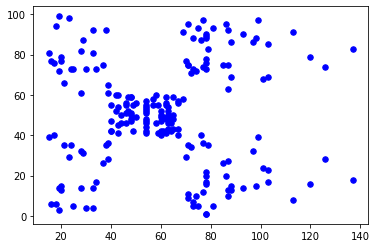

In [4]:

plt.scatter(X["A"], X["B"], s = 30, c = 'b')
plt.show()

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
green
blue
black
yellow
orange


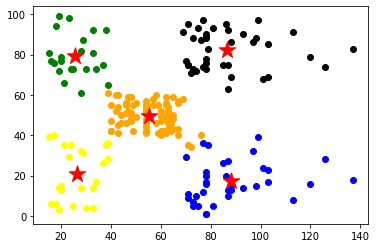

In [5]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

clusters = Kmean.fit_predict(X)
dataset["label"] = clusters
dataset.head()


col=['green','blue','black','yellow','orange',]
for i in range(5):
    a=col[i]
    print(a)
    plt.scatter(dataset.A[dataset.label==i], dataset.B[dataset.label == i], c=a, label='cluster 1')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300,
                c='r', label='centroid')


plt.show()

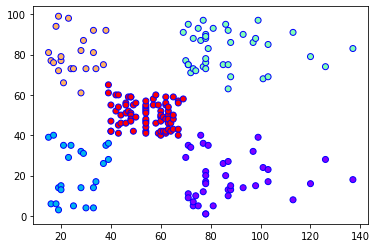

In [6]:
#BIRCH
import matplotlib.pyplot as plt 
from sklearn.cluster import Birch 
  
# Creating the BIRCH clustering model 
model = Birch(branching_factor =30, n_clusters = 5, threshold = 2.5) 
  
# Fit the data (Training) 
model.fit(X) 
  
# Predict the same data 
pred = model.predict(X) 
  
# Creating a scatter plot 
plt.scatter(dataset["A"], dataset["B"], c = pred, cmap = 'rainbow', alpha = 1, edgecolors = 'b') 
plt.show()

In [7]:
#CHAMELEON